# Identifying Polar and Non-Polar Bonds

**Created and developed by [Suparna Kompalli](https://www.linkedin.com/in/suparna-kompalli-79463b229/) and [Brandon Concepcion](https://www.linkedin.com/in/brandonconcepcion/), with assistance and supervision by [Jonathan Ferrari](https://www.linkedin.com/in/jonathanferrari/), [Professor Darcie McClelland](https://www.linkedin.com/in/darcie-mcclelland-descalzo-56796b1b/), and [Professor Eric Van Dusen](https://www.linkedin.com/in/ericvd/) as part of our work with UC Berkeley's [College of Computing, Data Science and Society](https://cdss.berkeley.edu/) as well as [El Camino College](https://www.elcamino.edu/)**

## **Bond Polarity**

Welcome! In this assignment, we will explore the concept of chemical bonding, focusing on how to determine whether a bond is polar or non-polar. Understanding the nature of these bonds is crucial in chemistry as it influences the physical properties and behavior of molecules. We will also delve into identifying the specific bonds that make up different molecules, helping to develop a deeper understanding of molecular structure and its implications on molecular interactions. 

By the end of this assignment, you will be equipped with the knowledge to analyze and classify bonds in various compounds based on their polarity and the types of atomic interactions that hold them together. 

Start by running the cell below to import our neccessary libraries!

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import ipywidgets as widgets
from IPython.display import display
import io
from ipywidgets import interact
import rdkit.Chem.rdCoordGen as rdCoordGen
import py3Dmol as pm
from utils import *

df = pd.read_csv("properties.csv")

def draw_molecules(lst):
    elements = []
    for molecule in lst:
        m = Chem.MolFromSmiles(molecule)
        img = Draw.MolToImage(m)
        img_byte_array = io.BytesIO()
        img.save(img_byte_array, format='PNG')
        img_byte_array.seek(0) 
        elements.append(widgets.Image(value=img_byte_array.read(), format='png')) 
    row = widgets.HBox(elements)
    display(row)

<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">

## Section 1: Understanding Molecules

Let’s explore some molecules to better understand their composition. In this exercise, we’ll see how visualizations can help us gain deeper insights into chemical structures and reactions. 

It’s incredible to think that just a few hundred years ago, visualizing molecules like [ethanol](https://pubchem.ncbi.nlm.nih.gov/compound/Ethanol) would have been thought of as impossible without. Thanks to modern computational tools like [RDKit](https://www.rdkit.org/) and [py3Dmol](https://pypi.org/project/py3Dmol/), we can now generate and manipulate 2D and 3D representations of chemical structures efficiently!

Run the cell below. Please do not modify any of the lines—this cell has been pre-written to generate a specific visualization you’ll use to answer the following questions.

In [2]:
draw_molecules(['CCO'])

We can transition Ethanol to [Acetic Acid](https://pubchem.ncbi.nlm.nih.gov/compound/Acetic-Acid) (the main component of vinegar) by *oxiding the ethanol*-- a chemical process in which ethanol loses electrons and gains oxygen. This oxidation typically occurs in two steps: 

1. First, Ethanol (C₂H₅OH) is oxidized to acetaldehyde (CH₃CHO) by an oxidizing agent such as potassium dichromate (K₂Cr₂O₇) or any mild oxidizer. In this step, ethanol loses two electrons and one hydrogen atom (oxidized), forming acetaldehyde.

2. Acetaldehyde (CH₃CHO) is further oxidized to acetic acid (CH₃COOH). This is typically achieved by further oxidation using stronger oxidizers.

Converting ethanol to acetic acid requires two stages of oxidation: the first transforms ethanol into acetaldehyde, and the second further oxidizes acetaldehyde into acetic acid. We can further describe the process by using the table below:

| Step | Molecule        | Formula    | Description         |
|------|------------------|------------|---------------------|
| 1    | Ethanol          | C₂H₅OH     | Starting alcohol    |
| ↓    | Oxidation        |            | (loss of H, gain of O) |
| 2    | Acetaldehyde     | CH₃CHO     | Intermediate aldehyde |
| ↓    | Oxidation        |            | (further oxidation) |
| 3    | Acetic Acid      | CH₃COOH    | Final carboxylic acid product |

Let's try and visualize this transition!

Run the cell below. Please do not modify any of the lines—this cell has been pre-written to generate a specific visualization you’ll use to answer the following questions.

In [3]:
draw_molecules(['CCO', 'C=O', 'CC(=O)O'])

**Question 1.1:** How many hydrogen bonds are in Ethanol?

*Type Your Answer Here*

**Question 1.2:** How many hydrogen bonds are in Acetic Acid?

*Type Your Answer Here*

<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">

## Section 2: Building Molecules

We’ll begin our journey by learning how to construct the water molecule (H₂O). We'll promptly move to other examples later. 

The first step is to create an instance of a molecule. This is something we’ll need to do **each time** we want to build a new molecule from scratch.

Run the cell below to initialize the structure of the water molecule.

In [4]:
h2o_molecule = Chem.RWMol()

Now it's time to add atoms to our molecule! To do this, we first create an instance of the atom we want to include, and then we add it to our molecule.

Let’s start by adding an oxygen atom

In [5]:
oxygen = Chem.Atom(8)
oxygen_index = h2o_molecule.AddAtom(oxygen)

We begin by creating an element instance using the `Chem.Atom()` method, which takes the atomic number (i.e., number of protons/electrons) as an argument. Since oxygen has an atomic number of 8, we pass in the number 8 to represent it. After creating the atom, we add it to the molecule we initialized earlier.

**Question 2.1:** Use the cell below to add the rest of the atoms needed to build H2O. 

*Hint: Follow the example in the cell above.*

In [6]:
...

...

#answer

hydrogen1 = Chem.Atom(1)
hydrogen1_index = h2o_molecule.AddAtom(hydrogen1)

hydrogen2 = Chem.Atom(1)
hydrogen2_index = h2o_molecule.AddAtom(hydrogen2)

We have our atoms, but they aren’t connected yet! Let’s go ahead and add the necessary bonds to complete the structure of our molecule.

**Question 2.2:** Fill in the cell below to visualize our final H2O molecule.

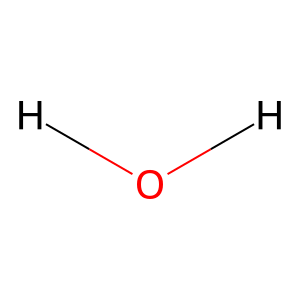

In [7]:
h2o_molecule.AddBond(oxygen_index, hydrogen1_index, Chem.BondType.SINGLE)
#h2o_molecule.AddBond(oxygen_index, ..., ...)
#answer
h2o_molecule.AddBond(oxygen_index, hydrogen2_index, Chem.BondType.SINGLE)


Chem.Draw.MolToImage(h2o_molecule)


**Question 2.3:** Using the example above, fill in the cell below to create a molecule of your choice!

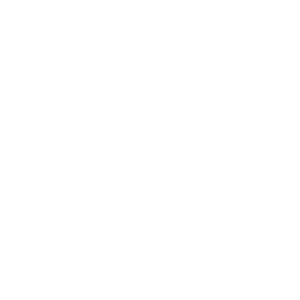

In [8]:
molecule = Chem.RWMol()

# YOUR WORK HERE

Draw.MolToImage(molecule)

<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">

## Section 3: Polar and Nonpolar Bonds

[Chemical bonds](https://www.britannica.com/science/chemical-bonding) form the foundation of molecules, determining their shape, interactions, and function in biological and chemical systems. In this section of the notebook, we will explore two fundamental types of covalent bonds: **polar** bonds and **non-polar** bonds. To understand this process a bit better, let's refer to the following analogy

#### Tug of War

Imagine it’s a scorching summer afternoon and you and your friend are locked in an intense game of tug-of-war. The rope stretches taut between you, perfectly balanced. Neither side is able to overpower the other. Since you both have the same strength and the same determination, for now it remains a fair fight.

If we swap out the rope for electrons, and the players for atoms—suddenly, you’re looking at the fundamental nature of [covalent](https://www.britannica.com/science/covalent-bond) chemical bonding.

#### Playing Fair

Now let's consider the case where you and your friend are **equally** strong. We wouldn't expect the rope to move much if at all. This is exactly what happens in **non-polar** covalent bonds. When two atoms have equal or nearly equal electronegativities, they share electrons relatively evenly.

Examples of this include:

* O₂ (oxygen gas)
* N₂ (nitrogen gas)
* CH₄ (methane)

Since non-polar molecules have no distinct positive or negative sides, they tend to be hydrophobic (water-fearing) and don’t dissolve well in water. Think of how oil and water don’t mix—oil is made of non-polar molecules that refuse to interact with water.

#### "Hitting" the Gym

Now imagine that this friend of yours has been hitting the gym, where their [forearms](https://www.youtube.com/shorts/OG131ahIxEs) and [back](https://www.youtube.com/shorts/7yN-o28CKtc) have grown **massive**. When y'all play tug of war again, they *easily* pull the rope toward themselves, making the game unfair. This kind of scenario happens in [polar covalent bonds](https://www.sciencedirect.com/topics/chemistry/polar-covalent-bond), where for specific molecules, one atom is significantly more electronegative than the other. Thus, it yanks more on the shared electrons, bringing them closer.

This *uneven* sharing creates partial charges:

- The stronger atom (which pulls electrons closer) gets a partial negative charge (δ⁻)
- The weaker atom (which loses some electron density) gets a partial positive charge (δ⁺)
- This is why molecules like water (H₂O) are polar. Oxygen is electronegative and pulls the electrons away from hydrogen, making it slightly negative (δ⁻) and leaving the hydrogens slightly positive (δ⁺).

Some other examples of polar molecules include:

- H₂O (water)
- NH₃ (ammonia)
- CO (carbon monoxide)

Since polar molecules have distinct positive and negative sides, they are hydrophilic (water-loving) and dissolve easily in water. This is why salt and sugar dissolve in water, but oil does not.

### Electronegativity

Below we reference [Dr. Scott's](https://learnwithdrscott.com/) simplifed table of electronegativity values for the elements in the periodic table. You’ll notice that the noble gases typically have no listed electronegativity values. This is because they already possess a full valence shell (octet) and, in most cases, do not need to form bonds with other elements.

<div style="text-align: center;">
    <img src="assets/electronegative.png" width="700">
</div>


**Question 1.1** Use the table above to determine the electronegativity value of gold (Au). Assign this value to it to the variable `gold_EN`.

In [9]:
gold_EN = ...

#### Electronegativity Difference

The difference in electronegativity (ΔEN) between two bonded atoms determines whether the bond is:

- **Non-Polar Covalent**: Electrons are shared almost equally.

- **Polar Covalent**: Electrons are unequally shared, creating partial charges.

- **Ionic**: One atom completely transfers electrons to another.

The table below summarizes these bond types based on **electronegativity difference ranges** and provides an example for each type.

| **Electronegativity Difference (ΔEN)** | **Bond Type**         | **Example Bond**     | **Explanation** |
|----------------------------------------|-----------------------|----------------------|-----------------|
| 0.0 - 0.4                              | Non-Polar Covalent    | C-H (ΔEN = 0.4)      | Electrons are shared almost equally, no significant charge separation. |
| 0.5 - 1.7                              | Polar Covalent        | O-H (ΔEN = 1.4)      | Electrons are unequally shared, creating partial positive and negative charges. |
| > 1.7                                  | Ionic                 | Na-Cl (ΔEN = 2.1)    | One atom completely transfers electrons to another, forming charged ions. |



**Question 1.2** For each of the following bonds, use [Dr. Scott's](https://learnwithdrscott.com/) table to determine the electronegativity difference between the two elements involved. Then, assign that value to the corresponding variable as shown below: 
* MgCl₂
* TiO
* S-F
* N-O
* C-S
* Cl-O

In [10]:
Mg_Cl = ...
Ti_O = ...
S_F = ...
N_O = ...
C_S = ...
Cl_O = ...

### 3) Glycine C₂H₅NO₂

In this next part of the notebook, we’ll apply what we’ve learned about molecular structure and electronegativity differences to determine whether the Glycene molecule is polar or nonpolar.

To begin, let’s calculate the electronegativity differences for each of the bonds in the molecule!

**Question 3.1.** For each of the following bonds in glycine, calculate the electronegativity difference using Dr. Scott’s table. Remember to subtract the smaller electronegativity from the larger one so the result is positive.

In [11]:
en_diff_C_H = ...   # Carbon–Hydrogen bond
en_diff_C_O = ...   # Carbon–Oxygen bond
en_diff_N_H = ...   # Nitrogen–Hydrogen bond
en_diff_C_N = ...   # Carbon–Nitrogen bond

**Question 3.2** Based on the electronegativity differences you calculated, which of the following bonds in glycine are polar?

1. Only the C–H bonds

2. Only the C–O and N–H bonds

3. All of the listed bonds (C–H, C–O, N–H, and C–N)

4. None of them

Set the variable `answer` to the **number** corresponding to your chosen option. For example, if you believe options 1 is correct, set `answer` = 1.

In [12]:
answer = ...

Now that we have identified which of the bonds are polar, let's try and determine the molecular shape of glycine! We will first use Rdkit to accomplish this. 

**Question 3.3.** Fill in the ellipses below with the correct atomic numbers for each element in glycine. For example, in the carbon assignment statement, we used 6 because carbon is the sixth element on the periodic table! Use the comments to help guide your choices.  

In [13]:
# Create an editable molecule
glycine = Chem.RWMol()

# Add atoms to the molecule
carbon = glycine.AddAtom(Chem.Atom(6))     # Carbon atom 
hydrogen = glycine.AddAtom(Chem.Atom(1))   # Hydrogen atom  #OMIT 
oxygen = glycine.AddAtom(Chem.Atom(8))     # Oxygen atom  #OMIT 
nitrogen = glycine.AddAtom(Chem.Atom(7))   # Nitrogen atom  #OMIT 

**Question 3.4.** We haven’t added all the remaining atoms needed to complete the glycine molecule yet! Let’s go ahead and add the additional hydrogen, oxygen, and nitrogen atoms to our molecule below. Feel free to reference the code above for guidance on how to add atoms using `Chem.Atom()`. Remember, glycine contains multiple atoms of some elements!

In [14]:
# Add a second carbon atom
carbon2 = glycine.AddAtom(Chem.Atom(6))     # Carbon atom

# Add remaining hydrogen atoms (we've already added 1, so we add 4 more)
hydrogen2 = glycine.AddAtom(Chem.Atom(1))
hydrogen3 = glycine.AddAtom(Chem.Atom(1))
hydrogen4 = glycine.AddAtom(Chem.Atom(1))
hydrogen5 = glycine.AddAtom(Chem.Atom(1))

# Add a second oxygen atom (we've already added 1)
oxygen2 = glycine.AddAtom(Chem.Atom(8))

**Question 3.5.** We’ve created the basic scaffolding for our glycine molecule—now it’s time to start adding the bonds between the atoms!

To help you get started, we've added the first carbon–nitrogen bond as an example. Using this format, add the remaining bonds to correctly connect all the atoms in glycine based on its structure.

Hint: Think about how the atoms are arranged in glycine’s structure (C₂H₅NO₂), including the backbone and side groups!

In [15]:
from rdkit.Chem import rdchem

# Define bond type for single bonds
SINGLE = rdchem.BondType.SINGLE
DOUBLE = rdchem.BondType.DOUBLE

# Add bonds to complete the glycine structure

# Backbone: NH₂–CH₂–COOH
glycine.AddBond(nitrogen, hydrogen, SINGLE)      # N–H
glycine.AddBond(nitrogen, hydrogen2, SINGLE)     # N–H
glycine.AddBond(nitrogen, carbon, SINGLE)        # N–C (first carbon)

glycine.AddBond(carbon, hydrogen3, SINGLE)       # C–H
glycine.AddBond(carbon, hydrogen4, SINGLE)       # C–H
glycine.AddBond(carbon, carbon2, SINGLE)         # C–C (connect to second carbon)

glycine.AddBond(carbon2, oxygen, DOUBLE)         # C=O
glycine.AddBond(carbon2, oxygen2, SINGLE)        # C–O
glycine.AddBond(oxygen2, hydrogen5, SINGLE)      # O–H

9

Now that we have added all of our molecules, let's try using RDkit to go about visualizing this in 2 dimensions. 

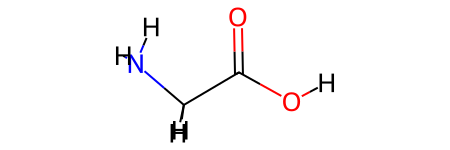

In [16]:
# Convert to a normal molecule object
glycine = glycine.GetMol()

# Explicitly compute valence & add hydrogens
Chem.SanitizeMol(glycine)
glycine = Chem.AddHs(glycine)

# Generate 3D coordinates
AllChem.EmbedMolecule(glycine)

# Display the molecule
glycine

It's a bit hard to see the shape of this molecule in 2 dimensions. Let's try moving up to 3D! 

Run the cell below. Please do not modify any of the lines—this cell has been pre-written to generate a specific visualization you’ll use to answer the following questions.

In [17]:
# Function to convert RDKit molecule to 3D (assuming it's defined)
glycine_3d = molecule_to_3d(glycine)

# Create a 3D viewer
view = pm.view(width=400, height=400)

# Load the molecule data
view.addModel(Chem.MolToMolBlock(glycine_3d), "mol")

# Apply enhanced styles
view.setStyle({
    "stick": {"radius": 0.2, "colorscheme": "Jmol"},  # Stick representation with colors
    "sphere": {"scale": 0.5, "colorscheme": "Jmol"},  # Spheres for atoms
})

# Add title label
view.addLabel(
    "Glycine (C₂H₅NO₂)",  # Title text
    {"position": {"x": 0, "y": 2, "z": 0}, "backgroundColor": "white", "fontColor": "black", "fontSize": 16}
)

# Adjust background and zoom
view.setBackgroundColor("white")
view.zoomTo()

# Show the visualization
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Perfect! We can now see a 3d representation of our molecule!

In the 3D model above, each atom is represented by a specific color using the **Jmol** color scheme:

- **Carbon (C)** – Gray or black  
- **Hydrogen (H)** – White  
- **Oxygen (O)** – Red  
- **Nitrogen (N)** – Blue  

Based on the visualization above, answer the following questions




**Question 3.6.** Glycine has multiple atoms and functional groups, so instead of a single overall molecular shape, we’ll focus on local geometries around key atoms.

- What is the approximate shape around the central carbon atom (the one bonded to both the amine and carboxyl groups)?

- What is the bond angle between the atoms attached to that central carbon?

Assign `mol_shape` to one of the following integers based on your shape selection

1. Linear

2. Trigonal planar

3. Tetrahedral

and assign `angle` to your estimated bond angle (in degrees)

In [18]:
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [33]:
mol_shape = 3 #SOLUTION
angle = 109.5 #SOLUTION

Now that we've identified the local geometry of glycine, let’s consider the molecule's overall polarity.

**Question 3.7.** Based on the electronegativity differences and the 3D structure you visualized, do you think glycine is a polar molecule? Assign the variable `polar` to `True` if you believe glycine is **polar**, or `False` if you think it is **nonpolar**

*Hint: Consider whether the polar bonds in glycine are arranged symmetrically or asymmetrically*

In [19]:
polar = True

**Question 3.8.** Explain your reasoning in the box below

*Type Your Answer Here*

**Question 3.9.** If you place glycine in water (H₂O) and hexane (C₆H₁₄), in which solvent will it dissolve better? Assign the number of your answer choice to the variable soluble.

1. Water, because glycine is polar.

2. Hexane, because glycine is nonpolar.

3. Neither, because glycine has both polar and nonpolar bonds.

4. Both, because polarity doesn’t affect solubility.

In [ ]:
soluble = 1 #SOLUTION

**Question 3.10** Explain your reasoning in the box below

*Type Your Answer Here*

<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">

## Congratulations! 

Teddy 🧸 congratulates you on finishing the Bond Polarity notebook! 

<img src="assets/teddy.png" style="width: 20%;">


In this notebook, we

- Learned how to build molecules like water, methane, and glycine using RDKit and explored their 2D and 3D structures

- Investigated electronegativity differences between atoms to identify polar bonds

- Used molecular geometry and visualizations to determine whether a molecule is polar or nonpolar

- Applied concepts like bond angle and molecular symmetry to real-world examples

We hope you enjoyed learning how chemistry and computation come together to help us understand molecular behavior! If you're curious to explore further, consider diving into how molecular polarity affects properties like solubility, boiling points, and biological function. You could even build larger biomolecules or simulate chemical reactions using similar tools. This is just the beginning of what’s possible when we combine computation with molecular science!